# PROBALISTIC REASONING
## Name : Guruprasath M R
## Roll : CH.EN.U4AIE22015
### LAB-3

<center> Variable Elmination </center>

In [6]:
# # To install pgmpy uncomment the below line
# %pip install pgmpy

In [7]:
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD
from pgmpy.models import BayesianNetwork

In [8]:
G = BayesianNetwork()
G.add_nodes_from(["Burglary","Earthquake","Alarm","JohnCalls","MaryCalls"])
G.add_edges_from([("Burglary", "Alarm"),("Earthquake","Alarm"),("Alarm","JohnCalls"),("Alarm","MaryCalls")])
cpd_burglary = TabularCPD(variable='Burglary', variable_card=2, values=[[0.999], [0.001]])
cpd_earthquake = TabularCPD(variable='Earthquake', variable_card=2, values=[[0.998], [0.002]])
cpd_alarm = TabularCPD(variable='Alarm', variable_card=2, 
                       values=[[0.95, 0.94, 0.29, 0.001], 
                               [0.05, 0.06, 0.71, 0.999]],
                       evidence=['Burglary', 'Earthquake'],
                       evidence_card=[2, 2])
cpd_johncalls = TabularCPD(variable='JohnCalls', variable_card=2, 
                           values=[[0.9, 0.05],
                                   [0.1, 0.95]],
                           evidence=['Alarm'],
                           evidence_card=[2])
cpd_marycalls = TabularCPD(variable='MaryCalls', variable_card=2, 
                           values=[[0.7, 0.01],
                                   [0.3, 0.99]],
                           evidence=['Alarm'],
                           evidence_card=[2])
G.add_cpds(cpd_burglary, cpd_earthquake, cpd_alarm, cpd_johncalls, cpd_marycalls)

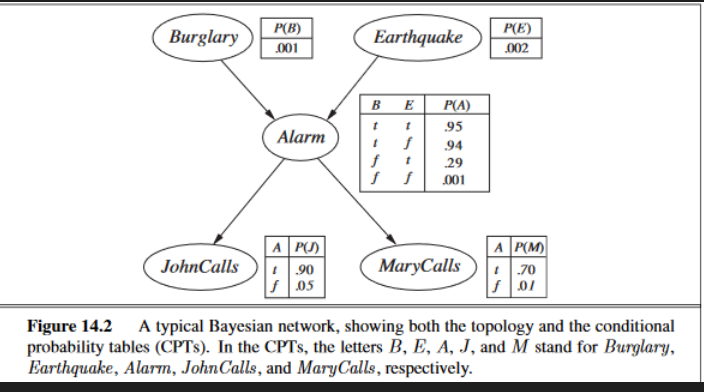

In [9]:
assert G.check_model()

In [10]:
infer = VariableElimination(G)

# Example query
result = infer.query(variables=['JohnCalls'], evidence={'Alarm': 1})
print(result)

+--------------+------------------+
| JohnCalls    |   phi(JohnCalls) |
+==============+==================+
| JohnCalls(0) |           0.0500 |
+--------------+------------------+
| JohnCalls(1) |           0.9500 |
+--------------+------------------+
